In [1]:
# import pandas as pd
# rides = pd.read_csv('mta.csv')
# sample_rides = rides.sample(20000)
# sample_rides[['Origin Station Complex ID', 'Origin Station Complex Name']]
# top_rides = rides.sample(200)
# top_rides.sort_values('Estimated Average Ridership', ascending=False)
# import networkx as nx
# G = nx.Graph()
# for station in set(list(set(top_rides['Origin Station Complex Name'])) + list(set(top_rides['Destination Station Complex Name']))):
#     G.add_node(station)
# for nodge in G.nodes:
#     print(nodge)
# G.add_edge(*top_rides[['Origin Station Complex Name', 'Destination Station Complex Name']])
    
# # node attributes: burough, name of station, station id, 
# # edge attributes: estimated ridership, day, hour
# # for edge, possible matrix (day of week X hour of day)
# # prob just individual edges

# G.edges

# origin = list(top_rides['Origin Station Complex Name'])
# dest = list(top_rides['Destination Station Complex Name'])
# ridership = list(top_rides['Estimated Average Ridership'])
# dow = list(top_rides['Day of Week'])
# hod = list(top_rides['Hour of Day'])

# for i, j, k, l, m in zip(origin, dest, ridership, dow, hod):
#     G.add_edge(i, j, ridership=k, day=l, hour=m)
# G.adj['116 St (C,B)']
# top_rides[top_rides['Origin Station Complex Name'] == '116 St (C,B)']
# G.number_of_nodes()
# G = nx.DiGraph()
# for i, j in zip(top_rides['Origin Station Complex ID'], top_rides['Origin Station Complex Name']):
#     G.add_node(i, name=j)
    
# origin = list(top_rides['Origin Station Complex ID'])
# dest = list(top_rides['Destination Station Complex ID'])
# ridership = list(top_rides['Estimated Average Ridership'])
# dow = list(top_rides['Day of Week'])
# hod = list(top_rides['Hour of Day'])

# for i, j, k, l, m in zip(origin, dest, ridership, dow, hod):
#     G.add_edge(i, j, ridership=k, day=l, hour=m)

# G.adj[299]
# top_rides[top_rides['Origin Station Complex ID'] == 146]
# import networkx_query as nxq
# query = {
#     "or": [
#         {"==": [("day",), 'Tuesday']},
#         {"==": [("day",), 'Wednesday']},
#         {"==": [("day",), 'Monday']}
#     ]
# }
# matching_nodes = nxq.search_edges(G, query)

# # Print the result
# print("Nodes matching the query:")
# for node in matching_nodes:
#     print(G.edges[node]['ridership'])
# top_rides

In [2]:
!pip install pandas
!pip install networkx
!pip install networkx_query

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import networkx as nx
import networkx_query as nxq
import matplotlib.pyplot as plt

In [4]:
rides = pd.read_csv('mta_rides.csv')
sample_rides = rides.sample(20000)
top_rides = rides.sample(200)

In [5]:
len(rides)

9169125

In [6]:
sample_rides[['Origin Station Complex ID', 'Origin Station Complex Name']]


,Origin Station Complex ID,Origin Station Complex Name
3167280,67,20 Av (D)
1592190,421,"Gun Hill Rd (2,5)"
2545601,164,"34 St-Penn Station (A,C,E)"
8362401,612,"Lexington Av-53 St (E,M)/51 St (6)"
7661134,351,Van Siclen Av (3)
...,...,...
3730290,69,25 Av (D)
188342,42,"Prospect Park (B,Q,S)"
6305623,314,66 St-Lincoln Center (1)
7863489,107,"Broad St (J,Z)"


In [7]:
top_rides.sort_values('Estimated Average Ridership', ascending=False)


,Year,Month,Day of Week,Hour of Day,Timestamp,Origin Station Complex ID,Origin Station Complex Name,Origin Latitude,Origin Longitude,Destination Station Complex ID,Destination Station Complex Name,Destination Latitude,Destination Longitude,Estimated Average Ridership,Origin Point,Destination Point
5093841,2024,1,Thursday,19,01/11/2024 07:00:00 PM,628,"Fulton St (A,C,J,Z,2,3,4,5)",40.710089,-74.007838,610,"Grand Central-42 St (S,4,5,6,7)",40.751992,-73.977359,217.8747,POINT (-74.007838 40.710089),POINT (-73.977359 40.751992)
7076453,2024,1,Friday,12,01/12/2024 12:00:00 PM,610,"Grand Central-42 St (S,4,5,6,7)",40.751992,-73.977359,619,"Broadway-Lafayette St (B,D,F,M)/Bleecker St (6)",40.725606,-73.995432,78.0280,POINT (-73.977359 40.751992),POINT (-73.995432 40.725606)
8024441,2024,1,Saturday,11,01/13/2024 11:00:00 AM,10,"49 St (N,R,W)",40.759901,-73.984139,607,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",40.749643,-73.987887,43.9350,POINT (-73.984139 40.759901),POINT (-73.987887 40.749643)
3796345,2024,1,Wednesday,8,01/10/2024 08:00:00 AM,235,York St (F),40.701397,-73.986751,228,"23 St (F,M)",40.742878,-73.992821,38.0422,POINT (-73.986751 40.701397),POINT (-73.992821 40.742878)
546437,2024,1,Monday,17,01/08/2024 05:00:00 PM,622,"Brooklyn Bridge-City Hall (4,5,6)/Chambers St ...",40.713154,-74.003766,628,"Fulton St (A,C,J,Z,2,3,4,5)",40.710089,-74.007838,27.8690,POINT (-74.003766 40.713154),POINT (-74.007838 40.710089)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2806633,2024,1,Tuesday,12,01/09/2024 12:00:00 PM,48,Avenue H (Q),40.629270,-73.961639,413,"Wall St (4,5)",40.707557,-74.011862,0.2338,POINT (-73.961639 40.62927),POINT (-74.011862 40.707557)
1035692,2024,1,Monday,9,01/08/2024 09:00:00 AM,101,"Marcy Av (M,J,Z)",40.708359,-73.957757,20,"City Hall (R,W)",40.713282,-74.006978,0.2266,POINT (-73.957757 40.708359),POINT (-74.006978 40.713282)
2597348,2024,1,Tuesday,10,01/09/2024 10:00:00 AM,321,18 St (1),40.741040,-73.997871,428,"174 St (2,5)",40.837288,-73.887734,0.2264,POINT (-73.997871 40.74104),POINT (-73.887734 40.837288)
441076,2024,1,Monday,5,01/08/2024 05:00:00 AM,636,"Jay St-MetroTech (A,C,F,R)",40.692259,-73.986642,88,"Norwood Av (J,Z)",40.681410,-73.880039,0.2084,POINT (-73.986642 40.692259),POINT (-73.880039 40.68141)


In [8]:
G = nx.Graph()
for station in set(list(set(top_rides['Origin Station Complex Name'])) + list(set(top_rides['Destination Station Complex Name']))):
    G.add_node(station)
# for nodge in G.nodes:
#     print(nodge)
G.add_edge(*top_rides[['Origin Station Complex Name', 'Destination Station Complex Name']])

In [9]:
origin = list(top_rides['Origin Station Complex Name'])
dest = list(top_rides['Destination Station Complex Name'])
ridership = list(top_rides['Estimated Average Ridership'])
dow = list(top_rides['Day of Week'])
hod = list(top_rides['Hour of Day'])

for i, j, k, l, m in zip(origin, dest, ridership, dow, hod):
    G.add_edge(i, j, ridership=k, day=l, hour=m)

In [10]:
G = nx.MultiDiGraph()
for i, j in zip(top_rides['Origin Station Complex ID'], top_rides['Origin Station Complex Name']):
    G.add_node(i, name=j)
    
origin = list(top_rides['Origin Station Complex ID'])
dest = list(top_rides['Destination Station Complex ID'])
ridership = list(top_rides['Estimated Average Ridership'])
dow = list(top_rides['Day of Week'])
hod = list(top_rides['Hour of Day'])

for i, j, k, l, m in zip(origin, dest, ridership, dow, hod):
    G.add_edge(i, j, ridership=k, day=l, hour=m)


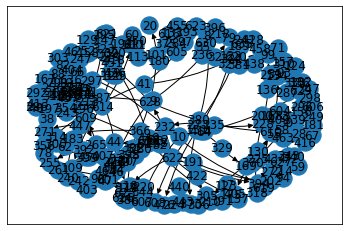

In [11]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True, connectionstyle='arc3, rad=0.1')
plt.show()

In [12]:
G.adj[404]


AdjacencyView({82: {0: {'ridership': 0.3117, 'day': 'Sunday', 'hour': 17}}})

In [13]:
top_rides[top_rides['Origin Station Complex ID'] == 450]


,Year,Month,Day of Week,Hour of Day,Timestamp,Origin Station Complex ID,Origin Station Complex Name,Origin Latitude,Origin Longitude,Destination Station Complex ID,Destination Station Complex Name,Destination Latitude,Destination Longitude,Estimated Average Ridership,Origin Point,Destination Point
4577228,2024,1,Thursday,15,01/11/2024 03:00:00 PM,450,103 St-Corona Plaza (7),40.749865,-73.8627,399,68 St-Hunter College (6),40.768141,-73.96387,3.8153,POINT (-73.8627 40.749865),POINT (-73.96387 40.768141)


In [14]:
query = {
    "or": [
        {"==": [("day",), 'Tuesday']},
        {"==": [("day",), 'Wednesday']},
        {"==": [("day",), 'Monday']}
    ]
    "and" :[
        {}
    ]
}
matching_nodes = nxq.search_edges(G, query)

# Print the result
print("Nodes matching the query:")
for node in matching_nodes:
    print(node)

SyntaxError: invalid syntax (991667147.py, line 7)

In [ ]:
G.edges

In [ ]:
top_rides[top_rides['Origin Station Complex ID'] == 164]

In [ ]:
for node in G.nodes:
    print(G[node])

In [ ]:
G.nodes

In [ ]:
for edge in G.edges:
    print(G[edge[0]][edge[1]][0]['ridership'])

In [ ]:
rides.head(10)

In [ ]:
stations = pd.read_csv('mta_stations.csv')

In [ ]:
list(stations[stations['Borough'] == 'SI']['Stop Name'])

In [ ]:
stations['Borough'].value_counts()

In [ ]:
top_rides['Origin Station Complex Name'].apply(lambda x: x in list(stations[stations['Borough'] == 'SI']['Stop Name'])).sum()

In [ ]:
top_rides[top_rides['Origin Station Complex Name'] in list(stations[stations['Borough'] == 'SI']['Stop Name'])]

In [ ]:
top_rides

In [15]:
!pip install pandas
!pip install networkx
!pip install networkx_query
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
rides = pd.read_csv('mta_rides.csv')
stations = pd.read_csv('mta_stations.csv')
sample_rides = rides.sample(20000)
top_rides = rides.sample(200)

In [3]:
G = nx.MultiDiGraph()
# for i, j in zip(top_rides['Origin Station Complex ID'], top_rides['Origin Station Complex Name']):
#     G.add_node(i, name=j)
    
for i, j, k in zip(stations['Station ID'], stations['Stop Name'], stations['Borough']):
    G.add_node(i, name=j, borough=k)
    
origin = list(top_rides['Origin Station Complex ID'])
dest = list(top_rides['Destination Station Complex ID'])
ridership = list(top_rides['Estimated Average Ridership'])
dow = list(top_rides['Day of Week'])
hod = list(top_rides['Hour of Day'])

for i, j, k, l, m in zip(origin, dest, ridership, dow, hod):
    G.add_edge(i, j, ridership=k, day=l, hour=m)


In [19]:
G.nodes[461]

{'name': 'Queensboro Plaza', 'borough': 'Q'}

In [ ]:
stations[(stations['Station ID'].value_counts() > 1).sort_index()]

In [ ]:
stations[stations['Station ID'] == 461]

In [ ]:
(stations['Station ID'].value_counts() > 1).sort_index()

In [ ]:
(set(rides['Origin Station Complex ID']) | set(rides['Destination Station Complex ID'])) - set(stations['Station ID'])

In [ ]:
stations[stations['Complex ID'] == 601]

In [ ]:
rides[(rides['Origin Station Complex ID'] > 600) & (rides['Origin Station Complex ID'] < 650)]

In [ ]:
len(set(stations['Station ID']))

In [ ]:
[print(i) for i in range(524) if i not in set(stations['Station ID'])]

In [5]:
stations_borough = stations[['Complex ID', 'Borough']]

In [6]:
stations_borough[stations_borough['Complex ID']==611].index


Index([10, 162, 317, 468, 469], dtype='int64')

In [7]:
rides['Origin Station Complex ID'].value_counts()

Origin Station Complex ID
611    64836
602    56375
610    56142
607    55668
628    54492
       ...  
206     4452
200     4037
201     2905
199     2119
202     1577
Name: count, Length: 424, dtype: int64

In [8]:
stations[stations['Complex ID'] == 611]

,GTFS Stop ID,Station ID,Complex ID,Division,Line,Stop Name,Borough,CBD,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Northbound,ADA Southbound,ADA Notes,Georeference
10,R16,11,611,BMT,Broadway - Brighton,Times Sq-42 St,M,True,N Q R W,Subway,40.754672,-73.986754,Uptown,Downtown,1,1,1,NaN,POINT (-73.986754 40.754672)
162,A27,163,611,IND,8th Av - Fulton St,42 St-Port Authority Bus Terminal,M,True,A C E,Subway,40.757308,-73.989735,Uptown,Downtown,1,1,1,NaN,POINT (-73.989735 40.757308)
317,127,317,611,IRT,Broadway - 7Av,Times Sq-42 St,M,True,1 2 3,Subway,40.755290,-73.987495,Uptown,Downtown,1,1,1,NaN,POINT (-73.987495 40.75529)
468,725,467,611,IRT,Flushing,Times Sq-42 St,M,True,7,Subway,40.755477,-73.987691,Queens,Hudson Yards,1,1,1,NaN,POINT (-73.987691 40.755477)
469,902,468,611,IRT,Lexington - Shuttle,Times Sq-42 St,M,True,S,Subway,40.755983,-73.986229,Last Stop,Grand Central,1,1,1,NaN,POINT (-73.986229 40.755983)


In [9]:
rides[rides['Origin Station Complex ID'] == 611]['Origin Station Complex Name'].value_counts()

Origin Station Complex Name
Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)    64836
Name: count, dtype: int64

In [10]:
stations_borough = stations_borough.drop_duplicates()

In [11]:
stations_borough

,Complex ID,Borough
0,1,Q
1,2,Q
2,3,Q
3,4,Q
4,5,Q
...,...,...
491,517,SI
492,518,SI
493,519,SI
494,522,SI


In [12]:
origin_borough_rides = pd.merge(stations_borough, rides, left_on='Complex ID', right_on='Origin Station Complex ID', how='outer')

In [13]:
rides_complete = origin_borough_rides.rename(columns={'Borough':'Origin Borough'})

In [ ]:
rides_complete = pd.merge(rides_complete, stations_borough, left_on='Destination Station Complex ID', right_on='Complex ID', how='outer')

In [14]:
rides_complete

,Complex ID,Origin Borough,Year,Month,Day of Week,Hour of Day,Timestamp,Origin Station Complex ID,Origin Station Complex Name,Origin Latitude,Origin Longitude,Destination Station Complex ID,Destination Station Complex Name,Destination Latitude,Destination Longitude,Estimated Average Ridership,Origin Point,Destination Point
0,1,Q,2024.0,1.0,Monday,1.0,01/08/2024 01:00:00 AM,1.0,"Astoria-Ditmars Blvd (N,W)",40.775036,-73.912034,629.0,Lorimer St (L)/Metropolitan Av (G),40.713428,-73.950847,0.2784,POINT (-73.912034 40.775036),POINT (-73.950847 40.713428)
1,1,Q,2024.0,1.0,Monday,1.0,01/08/2024 01:00:00 AM,1.0,"Astoria-Ditmars Blvd (N,W)",40.775036,-73.912034,447.0,Flushing-Main St (7),40.759600,-73.830030,0.2286,POINT (-73.912034 40.775036),POINT (-73.83003 40.7596)
2,1,Q,2024.0,1.0,Monday,1.0,01/08/2024 01:00:00 AM,1.0,"Astoria-Ditmars Blvd (N,W)",40.775036,-73.912034,461.0,"Queensboro Plaza (7,N,W)",40.750582,-73.940202,0.2784,POINT (-73.912034 40.775036),POINT (-73.940202 40.750582)
3,1,Q,2024.0,1.0,Monday,1.0,01/08/2024 01:00:00 AM,1.0,"Astoria-Ditmars Blvd (N,W)",40.775036,-73.912034,164.0,"34 St-Penn Station (A,C,E)",40.752287,-73.993391,0.7854,POINT (-73.912034 40.775036),POINT (-73.993391 40.752287)
4,1,Q,2024.0,1.0,Monday,1.0,01/08/2024 01:00:00 AM,1.0,"Astoria-Ditmars Blvd (N,W)",40.775036,-73.912034,198.0,Howard Beach-JFK Airport (A),40.660476,-73.830301,0.2784,POINT (-73.912034 40.775036),POINT (-73.830301 40.660476)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9169141,636,Bk,2024.0,1.0,Sunday,12.0,01/14/2024 12:00:00 PM,636.0,"Jay St-MetroTech (A,C,F,R)",40.692259,-73.986642,64.0,71 St (D),40.619589,-73.998864,0.3100,POINT (-73.986642 40.692259),POINT (-73.998864 40.619589)
9169142,636,Bk,2024.0,1.0,Sunday,12.0,01/14/2024 12:00:00 PM,636.0,"Jay St-MetroTech (A,C,F,R)",40.692259,-73.986642,176.0,Lafayette Av (C),40.686113,-73.973946,1.5067,POINT (-73.986642 40.692259),POINT (-73.973946 40.686113)
9169143,636,Bk,2024.0,1.0,Sunday,12.0,01/14/2024 12:00:00 PM,636.0,"Jay St-MetroTech (A,C,F,R)",40.692259,-73.986642,271.0,"Steinway St (M,R)",40.756879,-73.920740,0.6387,POINT (-73.986642 40.692259),POINT (-73.92074 40.756879)
9169144,636,Bk,2024.0,1.0,Sunday,12.0,01/14/2024 12:00:00 PM,636.0,"Jay St-MetroTech (A,C,F,R)",40.692259,-73.986642,392.0,"125 St (4,5,6)",40.804138,-73.937594,0.6187,POINT (-73.986642 40.692259),POINT (-73.937594 40.804138)


In [15]:
1==2

False